In [4]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl

# variaveis de entrada
idade = ctrl.Antecedent(np.arange(0, 101, 1), 'idade')
colesterol = ctrl.Antecedent(np.arange(0, 301, 1), 'colesterol')
pressao = ctrl.Antecedent(np.arange(0, 201, 1), 'pressao')
taxa_cardiaca= ctrl.Antecedent(np.arange(0, 101, 1), 'taxa_cardiaca')

# variavel de saida
doenca_cardiaca = ctrl.Consequent(np.arange(0, 101, 1), 'doenca_cardiaca')

In [5]:
# funcao triangular para definir as funcoes de pertinencia
idade['jovem'] = fuzz.trimf(idade.universe, [0, 25, 50])
idade['meia_idade'] = fuzz.trimf(idade.universe, [25, 50, 75])
idade['velho'] = fuzz.trimf(idade.universe, [50, 75, 100])

colesterol['baixo'] = fuzz.trimf(colesterol.universe, [0, 100, 200])
colesterol['normal'] = fuzz.trimf(colesterol.universe, [100, 200, 250])
colesterol['alto'] = fuzz.trimf(colesterol.universe, [200, 250, 300])


pressao['baixa'] = fuzz.trimf(pressao.universe, [0, 50, 100])
pressao['normal'] = fuzz.trimf(pressao.universe, [50, 100, 150])
pressao['alta'] = fuzz.trimf(pressao.universe, [100, 150, 200])

taxa_cardiaca['baixa'] = fuzz.trimf(taxa_cardiaca.universe, [0, 50, 70])
taxa_cardiaca['normal'] = fuzz.trimf(taxa_cardiaca.universe, [50, 70, 90])
taxa_cardiaca['alta'] = fuzz.trimf(taxa_cardiaca.universe, [70, 90, 100])

doenca_cardiaca['baixo'] = fuzz.trimf(doenca_cardiaca.universe, [0, 25, 50])
doenca_cardiaca['medio'] = fuzz.trimf(doenca_cardiaca.universe, [25, 50, 75])
doenca_cardiaca['alto'] = fuzz.trimf(doenca_cardiaca.universe, [50, 75, 100])


regra1 = ctrl.Rule(idade['jovem'] & colesterol['baixo'] & pressao['baixa'] & taxa_cardiaca['baixa'], doenca_cardiaca['baixo'])
regra2 = ctrl.Rule(idade['meia_idade'] & colesterol['normal'] & pressao['normal'] & taxa_cardiaca['normal'], doenca_cardiaca['medio'])
regra3 = ctrl.Rule(idade['velho'] & colesterol['alto'] & pressao['alta'] & taxa_cardiaca['alta'], doenca_cardiaca['alto'])

# sistema de controle
sistema_controle = ctrl.ControlSystem([regra1, regra2, regra3])
decisao = ctrl.ControlSystemSimulation(sistema_controle)

decisao.input['idade'] = 45
decisao.input['colesterol'] = 150
decisao.input['pressao'] = 80
decisao.input['taxa_cardiaca'] =50

# metodo de media ponderada
decisao.compute()

doenca cardiaca: 24.999999999999993


/home/dks01/.local/lib/python3.9/site-packages/skfuzzy/control/fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


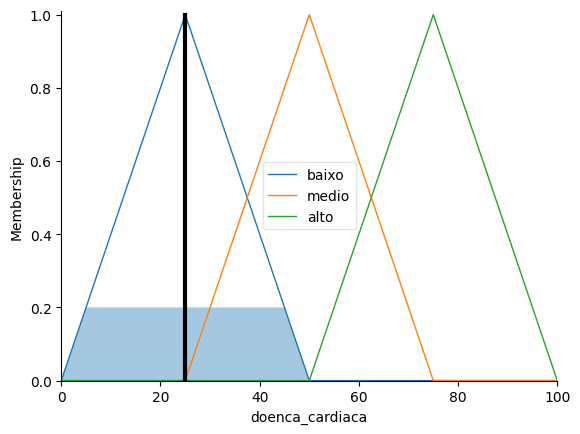

In [6]:
print("doenca cardiaca:", decisao.output['doenca_cardiaca'])
doenca_cardiaca.view(sim=decisao)